Uber Exploratory Analysis 
Analysing the dataset to get detailed information helping to scale up the business.
- DHRUMIL SHAH .

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import time, datetime as dt

In [2]:
data = pd.read_csv("C:/Users/Dhrumil/Desktop/uberexplo1.csv")

In [3]:
data.head(7)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,1/6/2016 17:30,1/6/2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting


In [4]:
data.tail(7)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1149,12/30/2016 23:06,12/30/2016 23:10,Business,Kar?chi,Kar?chi,0.8,Customer Visit
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [5]:
print(data.shape)
data.dtypes


(1156, 7)


START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [6]:
# checking for null values
data.isna().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [7]:
# As we can see this row contains wrong data for most of the columns. We will delete it
data.drop(data[data['END_DATE*'].isna()].index,axis=0,inplace=True)
data.isna().sum()

START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            0
MILES*           0
PURPOSE*       502
dtype: int64

In [8]:
#check duplicate rows
data[data.duplicated()]
data.drop(data[data.duplicated()].index, axis=0, inplace=True)
data[data.duplicated()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*


In [9]:
# finding and cleaning the data with same start time and end time
data[data['START_DATE*'] == data['END_DATE*']]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
751,9/6/2016 17:49,9/6/2016 17:49,Business,Unknown Location,Unknown Location,69.1,NaN
761,9/16/2016 7:08,9/16/2016 7:08,Business,Unknown Location,Unknown Location,1.6,NaN
798,10/8/2016 15:03,10/8/2016 15:03,Business,Karachi,Karachi,3.6,NaN
807,10/13/2016 13:02,10/13/2016 13:02,Business,Islamabad,Islamabad,0.7,NaN


In [10]:
data.drop(data.index[[751, 761, 798, 807]], inplace=True)

In [11]:
data.shape

(1150, 7)

C:\Users\Dhrumil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


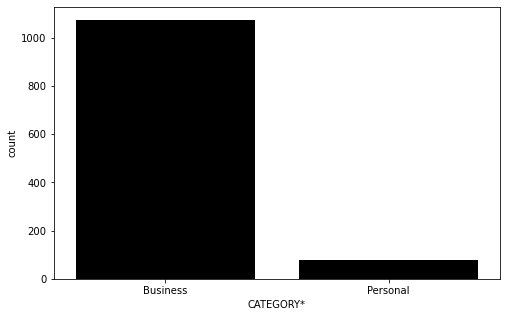

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(data['CATEGORY*'], color = "black")
plt.show()

C:\Users\Dhrumil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


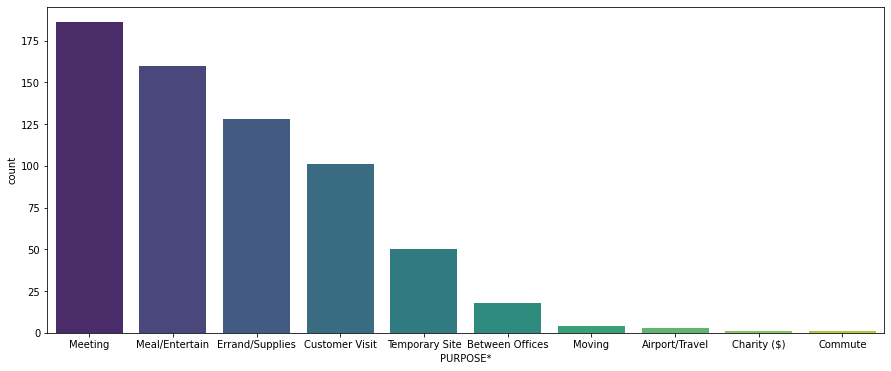

In [13]:
# plot the count for the purpose of the trip
plt.figure(figsize=(15,6))
sns.countplot(data['PURPOSE*'], order=data['PURPOSE*'].value_counts().index, palette='viridis')
plt.show()

In [14]:
# renaming columns for ease.
data = data.rename({'START_DATE*':'startdate', 
                    'END_DATE*':'enddate', 'CATEGORY*':'category', 
                    'START*':'start', 'STOP*':'stop', 'MILES*':'miles', 'PURPOSE*':'purpose'}, axis=1)
data.columns

Index(['startdate', 'enddate', 'category', 'start', 'stop', 'miles',
       'purpose'],
      dtype='object')

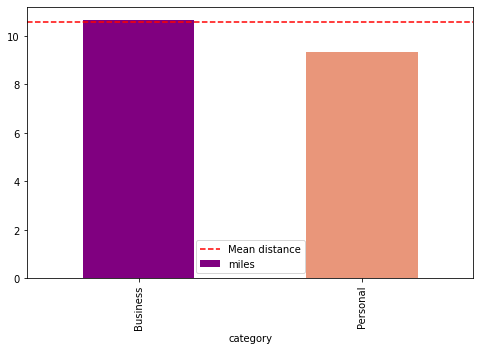

In [15]:
# finding the mean distance wrt to categories provided in the dataset.
plt.figure(figsize=(8,5))
data.groupby('category')['miles'].mean().plot.bar(color=['purple','darksalmon'])
plt.axhline(data['miles'].mean(), linestyle='--', color='red', label='Mean distance')
plt.legend()
plt.show()

In [16]:
# finding avg length of different types of trips
print('\n------- Average Length of Trip --------\n')
print('Business: ', round(data[data['category'] == 'Business'].miles.mean(),3))
print('Personal: ', round(data[data['category'] == 'Personal'].miles.mean(),3))
print('Meal/Entertain: ', round(data[data['purpose'] == 'Meal/Entertain'].miles.mean(),3))


------- Average Length of Trip --------

Business:  10.675
Personal:  9.321
Meal/Entertain:  5.698


In [17]:
data.startdate = pd.to_datetime(data.startdate)
data.enddate = pd.to_datetime(data.enddate)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1150 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   startdate  1150 non-null   datetime64[ns]
 1   enddate    1150 non-null   datetime64[ns]
 2   category   1150 non-null   object        
 3   start      1150 non-null   object        
 4   stop       1150 non-null   object        
 5   miles      1150 non-null   float64       
 6   purpose    652 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 111.9+ KB


In [18]:
data['minutes'] = (data['enddate'] - data['startdate']).dt.total_seconds()/60
data['year'] = data.startdate.dt.year
data['month'] = data.startdate.dt.month
data['week'] = data.startdate.dt.isocalendar().week
data['hour'] = data.startdate.dt.hour
data.head()

,startdate,enddate,category,start,stop,miles,purpose,minutes,year,month,week,hour
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,2016,1,53,21
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,12.0,2016,1,53,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,2016,1,53,20
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,2016,1,1,17
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,2016,1,1,14


Text(0, 0.5, 'FREQ  OF RIDES')

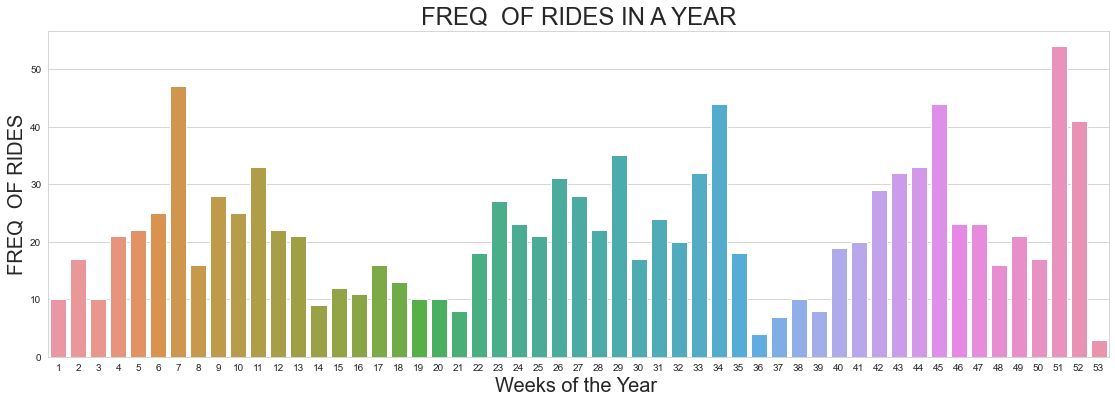

In [19]:
# GETTING THE NO RIDES PER WEEK
sns.set_style('whitegrid')
plt.subplots(figsize=(19,6))
plt.title("FREQ  OF RIDES IN A YEAR", fontsize=24)
sns.countplot(x="week", data=data)
plt.xlabel("Weeks of the Year ", fontsize=20)
plt.ylabel("FREQ  OF RIDES", fontsize=20)

Text(0, 0.5, 'Miles')

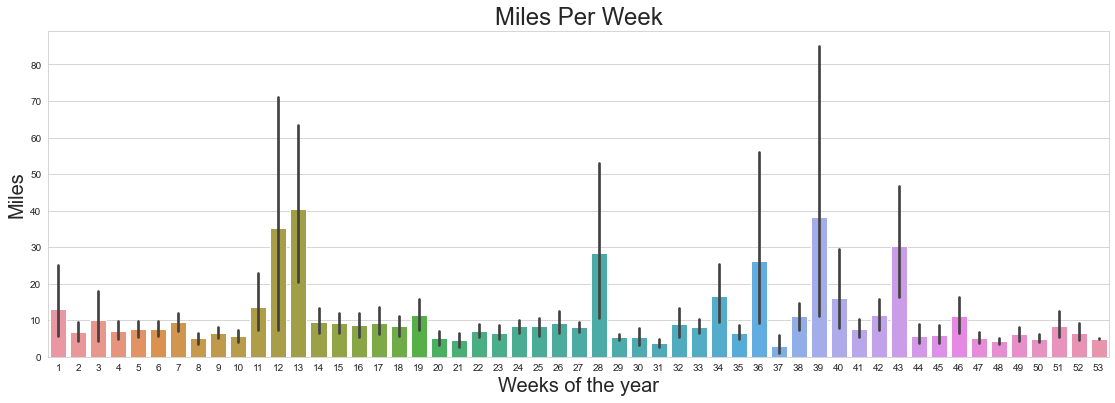

In [20]:
#Relation Weeks and Miles of the Year 2016
sns.set_style('whitegrid')
plt.subplots(figsize=(19,6))
plt.title("Miles Per Week", fontsize=24)
sns.barplot(x="week", y="miles", data=data)
plt.xlabel("Weeks of the year", fontsize=20)
plt.ylabel("Miles", fontsize=20)

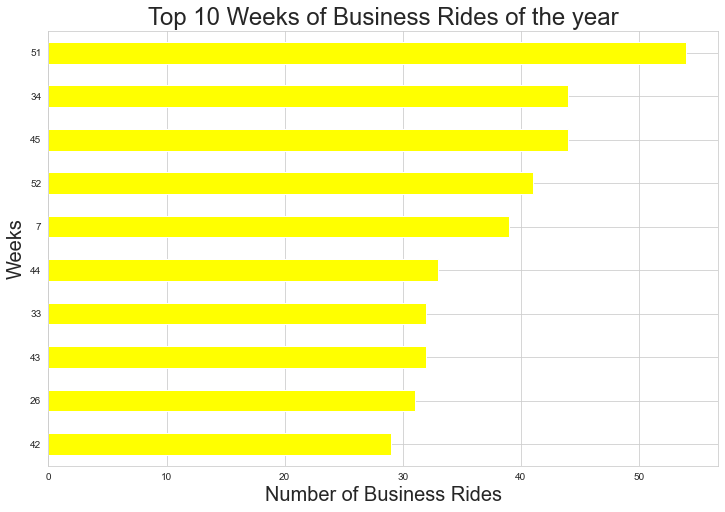

In [21]:
plt.subplots(figsize=(12,8))
data[data["category"]=="Business"]["week"].value_counts()[:10].sort_values().plot.barh(color = "yellow")
plt.title("Top 10 Weeks of Business Rides of the year", fontsize=24)
plt.xlabel("Number of Business Rides", fontsize=20)
plt.ylabel("Weeks", fontsize=20)
plt.show()

In [22]:
data['month'] = pd.DatetimeIndex(data['startdate']).month

In [23]:
dic = {1:'Jan', 2: 'Feb', 3: 'Mar', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'Aug', 9: 'Sep',
      10: 'Oct', 11: 'Nov', 12: 'Dec' }

data['month'] = data['month'].map(dic)

C:\Users\Dhrumil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


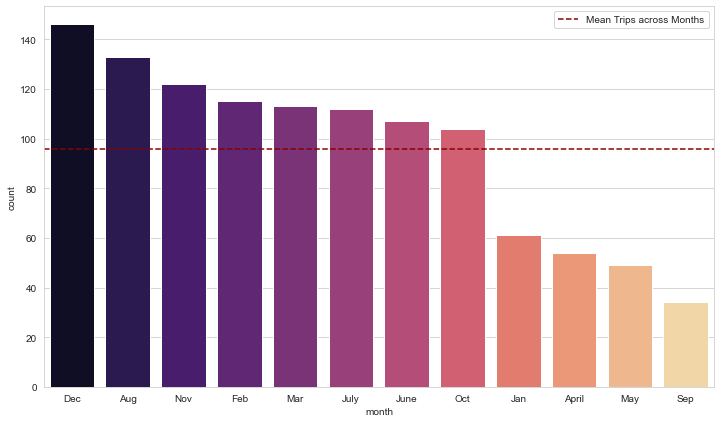

In [24]:
# evaluating Frequency of Trip in each Month
plt.figure(figsize=(12,7))
sns.countplot(data['month'], order=data['month'].value_counts().index, palette='magma')
plt.axhline(data['month'].value_counts().mean(),linestyle='--', color = 'darkred', label='Mean Trips across Months')
plt.legend()
plt.show()

C:\Users\Dhrumil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


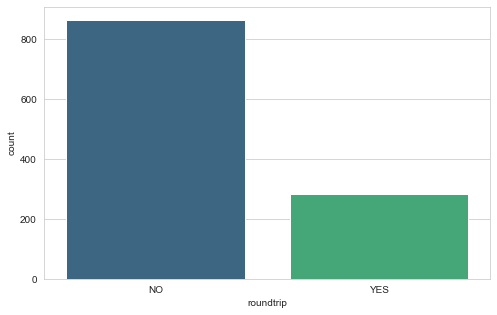

In [25]:
# finding round trips with start and end spots same.
plt.figure(figsize=(8,5))
def round(x):
    if x['start'] == x['stop']:
        return 'YES'
    else:
        return 'NO'
    
data['roundtrip'] = data.apply(round, axis=1)

sns.countplot(data['roundtrip'], order=data['roundtrip'].value_counts().index, palette='viridis')
plt.show()

C:\Users\Dhrumil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


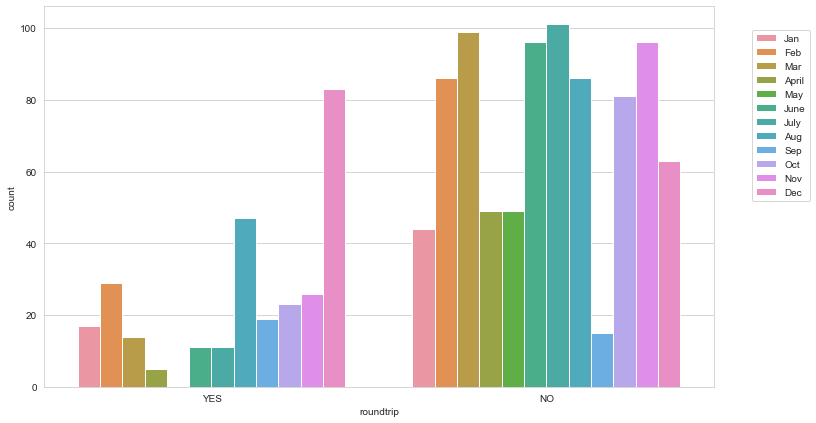

In [26]:
# finally finding the round trips in each  month
plt.figure(figsize=(12,7))
a=sns.countplot(data['roundtrip'],hue=data['month'])
plt.legend(bbox_to_anchor=(1.05, 0.95), loc=2)
plt.show()

In [27]:
# TO KNOW WHICH DAY OF THE WEEK HAS THE HIGHEST NUMBER OF TRIPS WE CREATE A F(N)
def day(x):
    day = x['startdate'].day_name()
    return day

data['day'] = data.apply(day, axis=1)

C:\Users\Dhrumil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


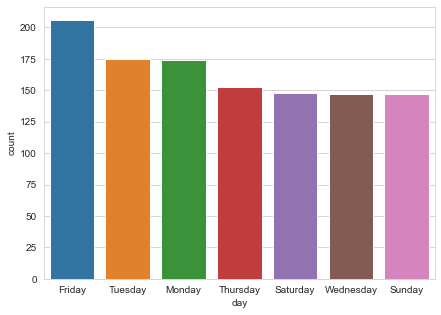

In [28]:
plt.figure(figsize=(7,5))
sns.countplot(data['day'], order = data['day'].value_counts().index)
plt.show()

C:\Users\Dhrumil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


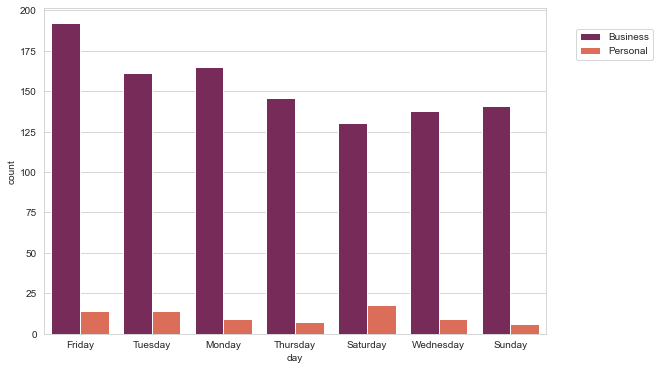

In [29]:
#category wise trips per day
plt.figure(figsize=(9,6))
a=sns.countplot(data['day'],hue=data['category'], palette='rocket',
                order=data['day'].value_counts().index)
plt.legend(bbox_to_anchor=(1.05, 0.95), loc=2)
plt.show()

Text(0, 0.5, 'Travel Time')

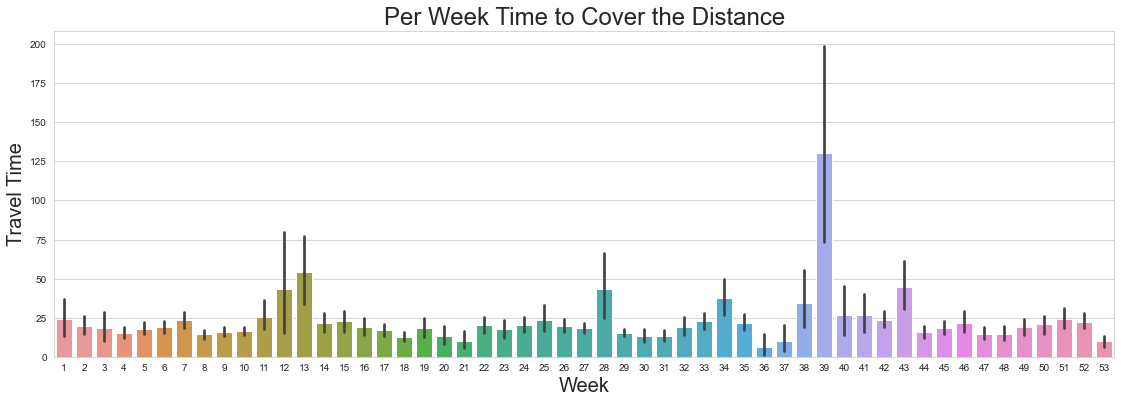

In [30]:
# Relation Between Weeks and Time to Cover the Distance
sns.set_style('whitegrid')
plt.subplots(figsize=(19,6))
sns.barplot(x="week", y="minutes", data=data)

plt.title("Per Week Time to Cover the Distance", fontsize=24)
plt.xlabel("Week", fontsize=20)
plt.ylabel("Travel Time", fontsize=20)

Text(0.5, 1.0, 'Comparision between Miles and Minutes(Time)')

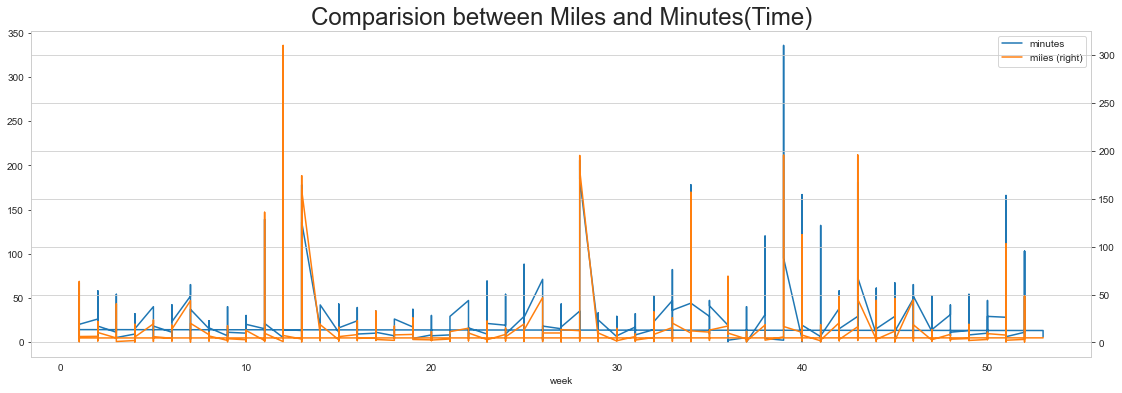

In [31]:
 # Finally creating the figure and axes of object
fig, ax = plt.subplots(figsize=(19,6)) 
data.plot(x = 'week', y = 'minutes', ax = ax) # Plot the first x and y axes:
data.plot(x = 'week', y = 'miles', ax = ax, secondary_y = True)
plt.title('Comparision between Miles and Minutes(Time)', fontsize=24)

In [32]:
print("Popular Starting Points\n------------------------\n", 
      data["start"].sort_values().value_counts().head(15) )

print("\n\nMost Stop/Drop Points\n----------------------\n", 
      data["stop"].sort_values().value_counts().head(15) )

Popular Starting Points
------------------------
 Cary                201
Unknown Location    146
Morrisville          85
Whitebridge          68
Islamabad            56
Durham               36
Lahore               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Apex                 17
Berkeley             16
Midtown              14
Kissimmee            11
R?walpindi           11
Name: start, dtype: int64


Most Stop/Drop Points
----------------------
 Cary                202
Unknown Location    146
Morrisville          84
Whitebridge          65
Islamabad            57
Lahore               36
Durham               36
Raleigh              29
Kar?chi              26
Apex                 17
Berkeley             16
Westpark Place       16
R?walpindi           13
Kissimmee            12
Midtown              11
Name: stop, dtype: int64


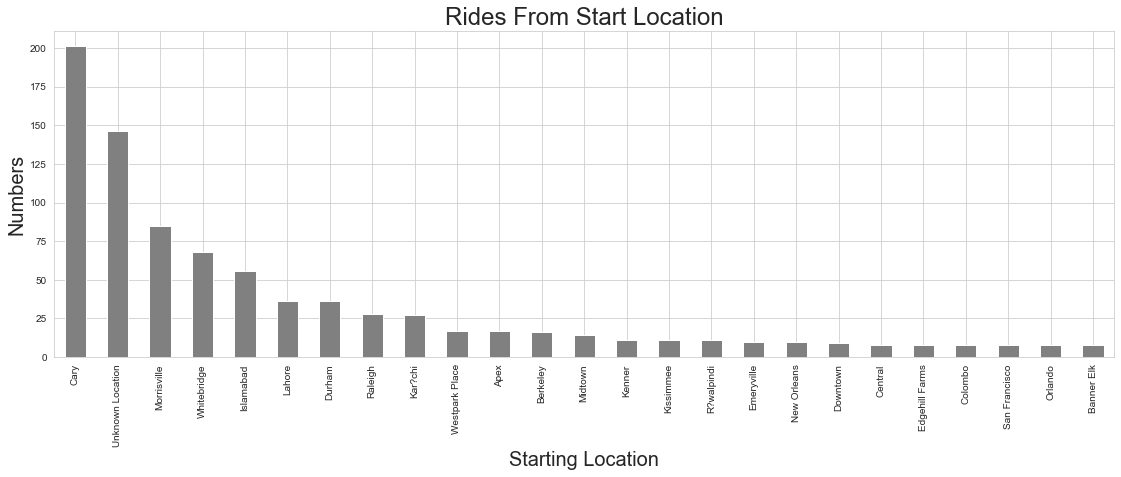

In [33]:
# finding the frequency of rides from  different start locations or plotting the popular startpoints.
plt.subplots(figsize=(19,6))
data["start"].value_counts()[:25].sort_values(ascending = False).plot.bar(color = "grey")

plt.title("Rides From Start Location", fontsize=24)
plt.xlabel("Starting Location", fontsize=20)
plt.ylabel("Numbers", fontsize=20)
plt.show()

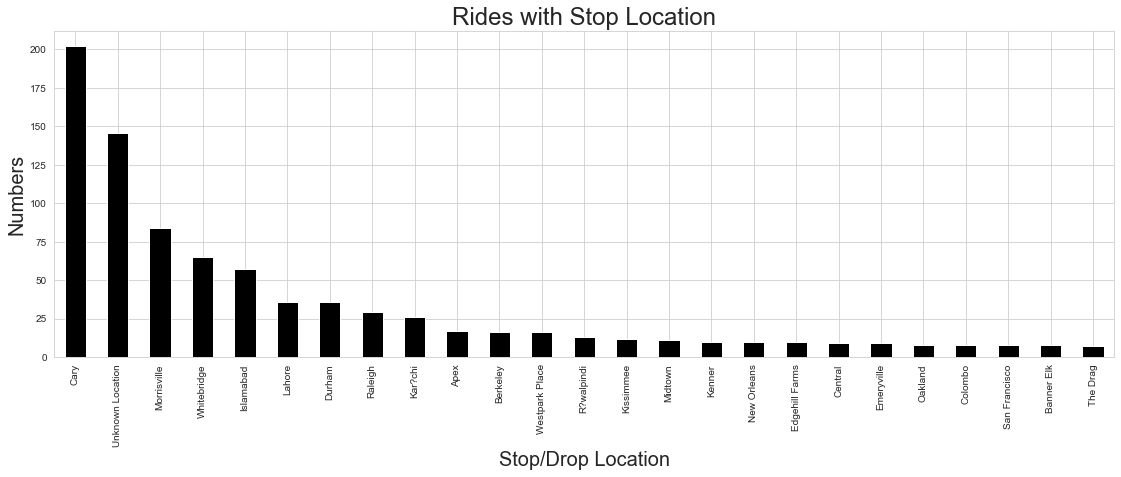

In [34]:
# # finding the frequency of rides from  different drop off or stop locations and plotting them.
plt.subplots(figsize=(19,6))
data["stop"].value_counts()[:25].sort_values(ascending = False).plot.bar(color = "black")

plt.title("Rides with Stop Location", fontsize=24)
plt.xlabel("Stop/Drop Location", fontsize=20)
plt.ylabel("Numbers", fontsize=20)
plt.show()


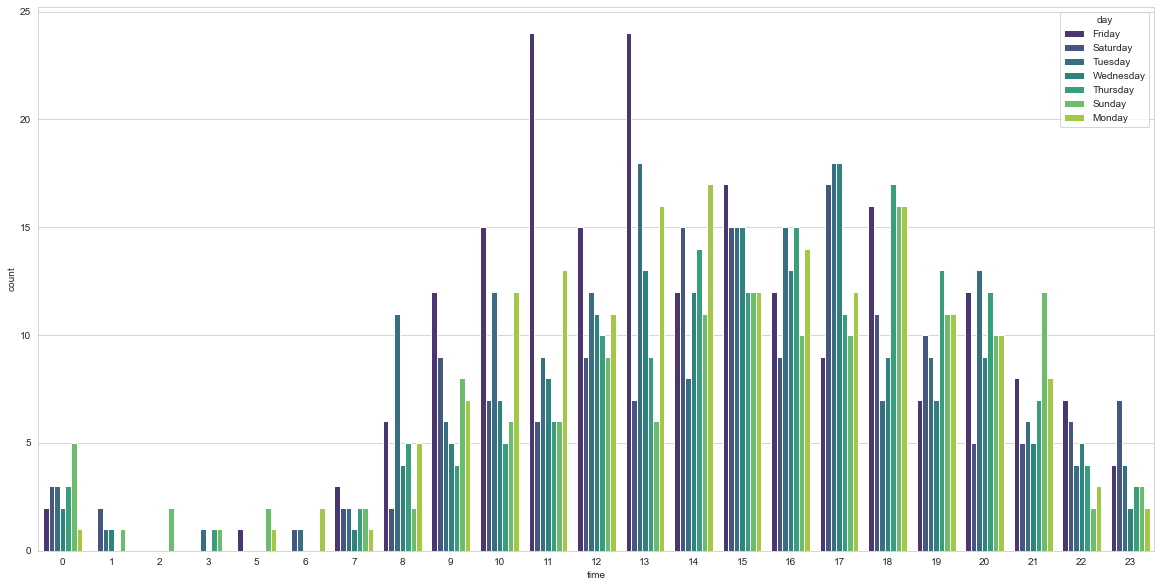

In [35]:
#finding the time which has the ost trips in a particular day
data['time'] = data['startdate'].dt.hour

plt.figure(figsize=(20,10))
sns.countplot(data=data, x=data['time'], hue=data['day'],
              palette="viridis", )
plt.show()


C:\Users\Dhrumil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


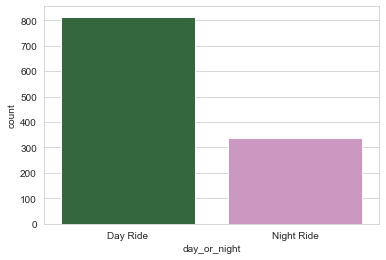

In [36]:
a = pd.to_datetime(['18:00:00']).time

data['day_or_night'] = data.apply(lambda x : 'Night Ride' if x['startdate'].time() > a else 'Day Ride', axis=1)

sns.countplot(data['day_or_night'], palette='cubehelix' , order = data['day_or_night'].value_counts().index)
plt.show()

C:\Users\Dhrumil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


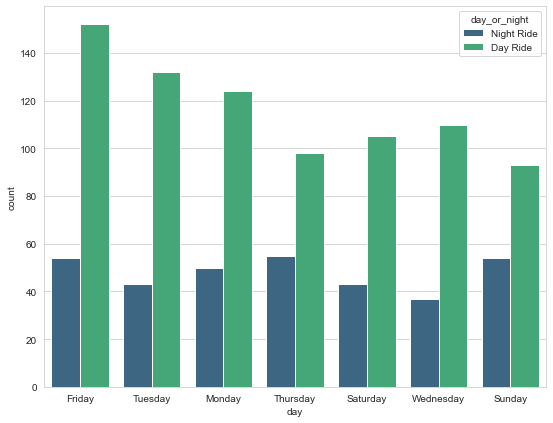

In [37]:
#finally plotting day versus night trips on a particular day.
plt.figure(figsize=(9,7))
sns.countplot(data['day'], hue=data['day_or_night'], palette='viridis' ,
              order=data['day'].value_counts().index)
plt.show()

C:\Users\Dhrumil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


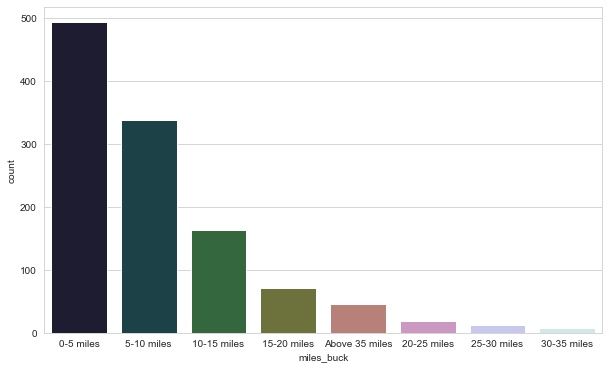

In [38]:
# Highest number of Day rides were on Friday while Night rides were on Sunday/Thursday 
# and finally  Converting the continuous Miles into buckets to do so we create a function.
f = {}

for i in data['miles']:
    for i in data['miles']:
        if i < 5:
            f.setdefault(i,'0-5 miles')
        elif i >= 5 and i < 10:
            f.setdefault(i,'5-10 miles')
        elif i >= 10 and i < 15:
            f.setdefault(i,'10-15 miles')
        elif i >= 15 and i < 20:
            f.setdefault(i,'15-20 miles')
        elif i >= 20 and i < 25:
            f.setdefault(i,'20-25 miles')
        elif i >= 25 and i < 30:
            f.setdefault(i,'25-30 miles')
        elif i >= 30 and i < 35:
            f.setdefault(i,'30-35 miles')
    
        else:
            f.setdefault(i,'Above 35 miles')
            
data['miles_buck'] = data['miles'].map(f)

plt.figure(figsize=(10,6))
sns.countplot(data['miles_buck'], palette='cubehelix' ,
              order = data['miles_buck'].value_counts().index)
plt.show()

C:\Users\Dhrumil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


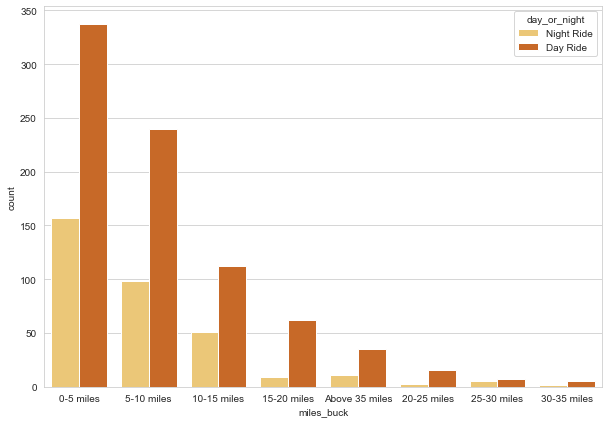

In [39]:
# One can see that there are more number of short distanced trips
plt.figure(figsize=(10,7))
sns.countplot(data['miles_buck'], hue=data['day_or_night'], palette='YlOrBr',
              order = data['miles_buck'].value_counts().index)
plt.show()
# concluding , Both highest number of Day and Night Rides were from 0- 5 miles of a distance